In [1]:
import nilearn

In [2]:
# HIDDEN 
# Let's keep our notebook clean, so it's a little more readable!
import warnings
warnings.filterwarnings('ignore')

## [Understanding neuroimaging data](http://nilearn.github.io/manipulating_images/input_output.html)

### Text files: phenotype or behavior

Phenotypic or behavioral data are often provided as a text or CSV (Comma Separated Values) file. They can be loaded with the [pandas package](https://pandas.pydata.org/) but you may have to specify some options. Here, we'll specify the `sep` field, since our data is tab-delimited rather than comma-delimited.

For our dataset, let's load participant level information:

In [3]:
import os
import pandas as pd

data_dir = '/home/jovyan/nilearn_data/development_fmri/development_fmri/'
participants = 'participants.tsv'
phenotypic_data = pd.read_csv(os.path.join(data_dir, participants), sep='\t')
phenotypic_data.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness,ToM Booklet-Matched,ToM Booklet-Matched-NOFB,FB_Composite,FB_Group,WPPSI BD raw,WPPSI BD scaled,KBIT_raw,KBIT_standard,DCCS Summary,Scanlog: Scanner,Scanlog: Coil,Scanlog: Voxel slize,Scanlog: Slice Gap
0,sub-pixar052,5.46,5yo,child,F,R,0.681818,0.625000,5.0,pass,NaN,NaN,27.0,130.0,2.0,3T2,32ch adult,3mm iso,0.1
1,sub-pixar109,10.38,8-12yo,child,F,R,0.960000,0.947368,6.0,pass,NaN,NaN,30.0,100.0,NaN,3T1,32ch adult,3.13 mm iso,None
2,sub-pixar042,5.01,5yo,child,F,L,0.681818,0.750000,3.0,inc,NaN,NaN,18.0,110.0,2.0,3T2,32ch adult,3mm iso,0.1
3,sub-pixar068,7.92,7yo,child,F,R,0.863636,0.875000,5.0,pass,NaN,NaN,38.0,137.0,NaN,3T2,32ch adult,3mm iso,0.1
4,sub-pixar110,10.78,8-12yo,child,F,R,1.000000,1.000000,6.0,pass,NaN,NaN,38.0,122.0,NaN,3T1,32ch adult,3.13 mm iso,None


### Nifti data

For volumetric data, nilearn works with data stored in the [Nifti structure](http://nipy.org/nibabel/nifti_images.html) (via the [nibabel package](http://nipy.org/nibabel/)).

The NifTi data structure (also used in Analyze files) is the standard way of sharing data in neuroimaging research. Three main components are:

  * data:	raw scans in form of a numpy array:  
    `data = img.get_data()`
  * affine:	returns the transformation matrix that maps from voxel indices of the `numpy` array to actual real-world     locations of the brain:  
    `affine = img.affine`
  * header:	low-level informations about the data (slice duration, etc.):  
  `header = img.header`

It is important to appreciate that the representation of MRI data we'll be using is a big 4D matrix representing (3D MRI + 1D for time), stored in a single Nifti file.

### Niimg-like objects

Nilearn functions take as input argument what we call "Niimg-like objects":

Niimg: A Niimg-like object can be one of the following:

  * A string with a file path to a Nifti image
  * A SpatialImage from `nibabel`, i.e., an object exposing the get_data() method and affine attribute, typically a Nifti1Image from `nibabel`.

Niimg-4D: Similarly, some functions require 4D Nifti-like data, which we call Niimgs or Niimg-4D. Accepted input arguments are:

  * A path to a 4D Nifti image
  * List of paths to 3D Nifti images
  * 4D Nifti-like object
  * List of 3D Nifti-like objects

**Note:** If you provide a sequence of Nifti images, all of them must have the same affine !

## [Manipulating and looking at data](http://nilearn.github.io/auto_examples/plot_nilearn_101.html#sphx-glr-auto-examples-plot-nilearn-101-py)

There is a whole section of the [Nilearn documentation](http://nilearn.github.io/plotting/index.html#plotting) on making pretty plots for neuroimaging data ! But let's start with a simple one.

In [4]:
# Let's use a Nifti file that is shipped with nilearn
from nilearn import datasets

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: {}'.format(datasets.MNI152_FILE_PATH))

Path to MNI152 template: /opt/conda/lib/python3.6/site-packages/nilearn/datasets/data/avg152T1_brain.nii.gz


In the above, MNI152_FILE_PATH is nothing more than a string with a path pointing to a nifti image. You can replace it with a string pointing to a file on your disk. Note that it should be a 3D volume, and not a 4D volume.

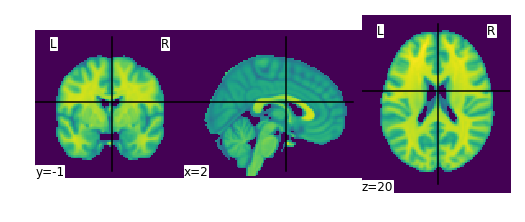

In [5]:
from nilearn import plotting
%matplotlib inline

plotting.plot_img(datasets.MNI152_FILE_PATH)

We can also directly manipulate these images using Nilearn ! As an example, let's try smoothing this image.

In [6]:
from nilearn import image
smooth_anat_img = image.smooth_img(datasets.MNI152_FILE_PATH, fwhm=6)

# While we are giving a file name as input, the function returns
# an in-memory object:
print(smooth_anat_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8186.02001953125
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : mni


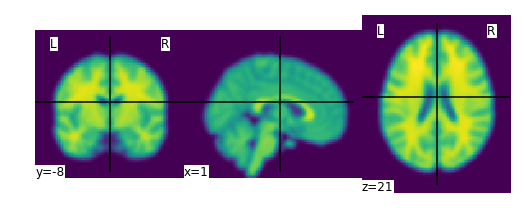

In [7]:
plotting.plot_img(smooth_anat_img)

We can then save this manipulated image from in-memory to disk as follows:

In [8]:
# smooth_anat_img.to_filename('smooth_anat_img.nii.gz')
# os.getcwd()  # We'll' check our "current working directory" (cwd) to see where the file was saved

## [Visualizing neuroimaging volumes](https://nilearn.github.io/auto_examples/01_plotting/plot_visualization.html#visualization)

What if we want to view not a structural MRI image, but a functional one ?
No problem ! Let's try loading one:

In [9]:
fmri_filename = 'sub-pixar109_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
# plotting.plot_epi(os.path.join(data_dir, fmri_filename))

Uh-oh, what happened ?! Let's look back at the error message:

> DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

We can fix that ! Let's take an average of the EPI image and plot that instead:

In [10]:
from nilearn.image import mean_img

plotting.view_img(mean_img(os.path.join(data_dir, fmri_filename)), threshold=None)

## [Convert the fMRI volumes to a data matrix](http://nilearn.github.io/auto_examples/plot_decoding_tutorial.html#convert-the-fmri-volume-s-to-a-data-matrix)

These are some really lovely images, but for machine learning we want matrices so that we can use all of the techniques we learned this morning !

To transform our Nifti images into matrices, we'll use the `nilearn.input_data.NiftiMasker` to extract the fMRI data from a mask and convert it to data series.

First, let's do the simplest possible mask&mdash;a mask of the whole brain. We'll use a mask that ships with Nilearn and matches the MNI152 template we plotted earlier.

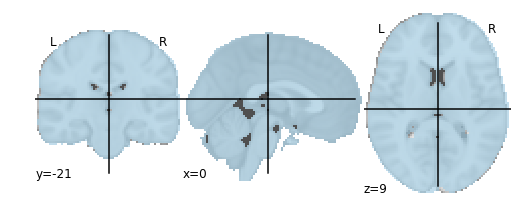

In [11]:
brain_mask = datasets.load_mni152_brain_mask()
plotting.plot_roi(brain_mask, cmap='Paired')

In [12]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=brain_mask, standardize=True)
masker

NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
      mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fee21fcb5f8>,
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [13]:
# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn !
fmri_masked = masker.fit_transform(os.path.join(data_dir, fmri_filename))
print(fmri_masked)

[[ -2.46781182e+00  -2.67007852e+00  -4.48857832e+00 ...,  -4.39526767e-01
    7.21451223e-01   7.84595236e-02]
 [  1.02899298e-01  -1.04104400e+00  -1.46710646e+00 ...,  -4.39009994e-01
    5.83695173e-01   7.43223906e-01]
 [ -9.04305649e+00  -9.81106377e+00  -8.46901321e+00 ...,   1.16129816e-01
    5.13390243e-01   1.89174011e-01]
 ..., 
 [ -9.28782403e-01  -3.53061348e-01   9.24790427e-02 ...,  -2.53264427e-01
   -3.80187541e-01  -2.81309426e-01]
 [ -6.69653893e-01  -7.78272897e-02   4.90018964e-01 ...,   8.03511497e-03
    2.88530111e-01  -2.03638941e-01]
 [ -1.85315013e-01   3.53153758e-02   3.71591300e-01 ...,   4.08590078e-01
    6.65539980e-01  -2.24340595e-02]]


In [14]:
print(fmri_masked.shape)

(168, 228453)


One way to think about what just happened is to look at it visually:

![](http://nilearn.github.io/_images/masking.jpg)

Essentially, we can think about overlaying a 3D grid on an image. Then, our mask tells us which cubes or "voxels" (like 3D pixels) to sample from. Since our Nifti images are 4D files, we can't overlay a single grid -- instead, we use a series of 3D grids (one for each volume in the 4D file), so we can get a measurement for each voxel at each timepoint. These are reflected in the shape of the matrix ! You can check this by checking the number of positive voxels in our brain mask.

There are many other strategies in Nilearn [for masking data and for generating masks](http://nilearn.github.io/manipulating_images/manipulating_images.html#computing-and-applying-spatial-masks). I'd encourage you to spend some time exploring the documentation for these !

We can also [display this time series](http://nilearn.github.io/auto_examples/03_connectivity/plot_adhd_spheres.html#display-time-series) to get an intuition of how the whole brain signal is changing over time.

We'll display the first three voxels by sub-selecting values from the matrix. You can also find more information on [how to slice arrays here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html#basic-slicing-and-indexing).

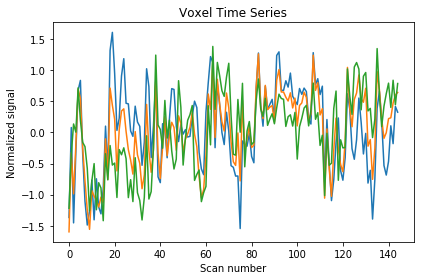

In [15]:
import matplotlib.pyplot as plt
plt.plot(fmri_masked[5:150, :3])

plt.title('Voxel Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

## [Extracting signals from a brain parcellation](http://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html#extracting-signals-from-a-brain-parcellation)

Now that we've seen how to create a data series from a single region-of-interest (ROI), we can start to scale up ! What if, instead of wanting to extract signal from one ROI, we want to define several ROIs and extract signal from all of them  ? Nilearn can help us with that, too ! 🎉

For this, we'll use `nilearn.input_data.NiftiLabelsMasker`. `NiftiLabelsMasker` which works like `NiftiMasker` except that it's for labelled data rather than binary. That is, since we have more than one ROI, we need more than one value ! Now that each ROI gets its own value, these values are treated as labels.

In [16]:
# First, let's load a parcellation that we'd like to use
multiscale = datasets.fetch_atlas_basc_multiscale_2015(data_dir="../../nilearn_data", resume=True)
print('Atlas ROIs are located at: %s' % multiscale.scale064)

Atlas ROIs are located at: /home/jovyan/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz


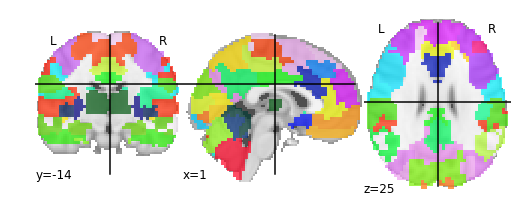

In [17]:
plotting.plot_roi(multiscale.scale064)

In [18]:
from nilearn.input_data import NiftiLabelsMasker
label_masker = NiftiLabelsMasker(labels_img=multiscale.scale064, standardize=True)
label_masker

NiftiLabelsMasker(background_label=0, detrend=False, dtype=None,
         high_pass=None,
         labels_img='/home/jovyan/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz',
         low_pass=None, mask_img=None, memory=Memory(location=None),
         memory_level=1, resampling_target='data', smoothing_fwhm=None,
         standardize=True, t_r=None, verbose=0)

In [19]:
fmri_matrix = label_masker.fit_transform(os.path.join(data_dir, fmri_filename))
print(fmri_matrix)

[[-0.24587893 -1.62436938  1.05949652 ...,  2.83225298  0.38711333
  -6.05006695]
 [ 1.6175766   1.82269943  0.71587718 ...,  1.60115886  0.38711333
   0.69677722]
 [-6.76797295 -7.36948395 -3.4075551  ...,  0.37006465 -2.15778995
  -7.06209373]
 ..., 
 [-0.55645484 -0.18809079  1.05949652 ..., -1.47657669 -0.46118778
  -0.31524941]
 [-0.55645484  0.09916494  1.05949652 ..., -1.06621194 -0.46118778
   0.35943499]
 [-0.24587893 -0.18809079  0.3722578  ..., -1.47657669 -0.46118778
   0.02209279]]


In [20]:
print(fmri_matrix.shape)

(168, 64)


### [Compute and display a correlation matrix](http://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html#compute-and-display-a-correlation-matrix)

Now that we have a matrix, we'd like to create a _connectome_. A connectome is a map of the connections in the brain. Since we're working with functional data, however, we don't have access to actual connections. Instead, we'll use a measure of statistical dependency to infer the (possible) presence of a connection.

Here, we'll use Pearson's correlation as our measure of statistical dependency and compare how all of our ROIs from our chosen parcellation relate to one another.

In [21]:
from nilearn import connectome
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(cov_estimator=LedoitWolf(assume_centered=False, block_size=1000, store_precision=False),
          discard_diagonal=False, kind='correlation', vectorize=False)

In [22]:
correlation_matrix = correlation_measure.fit_transform([fmri_matrix])
correlation_matrix

array([[[ 1.        ,  0.79118115,  0.39523318, ...,  0.52283996,
          0.56544089,  0.47097546],
        [ 0.79118121,  1.        ,  0.43269271, ...,  0.50233686,
          0.51261008,  0.56233442],
        [ 0.39523318,  0.43269268,  1.        , ...,  0.25408298,
          0.26091293,  0.2559599 ],
        ..., 
        [ 0.52284002,  0.50233686,  0.25408301, ...,  1.        ,
          0.62439972,  0.17996702],
        [ 0.56544083,  0.51261008,  0.26091293, ...,  0.62439972,
          1.        ,  0.5316267 ],
        [ 0.47097546,  0.56233442,  0.25595987, ...,  0.17996702,
          0.53162676,  1.        ]]], dtype=float32)

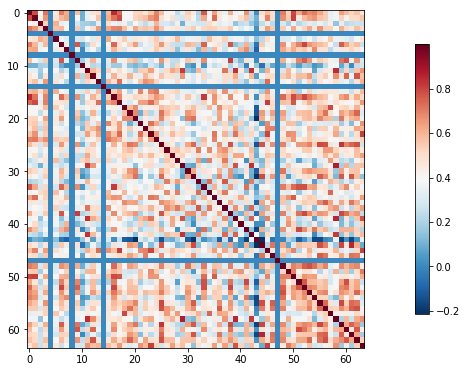

In [23]:
import numpy as np

correlation_matrix = correlation_matrix[0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

### [The importance of specifying confounds](http://nilearn.github.io/auto_examples/03_connectivity/plot_signal_extraction.html#same-thing-without-confounds-to-stress-the-importance-of-confounds)

In fMRI, we're collecting a noisy signal. We have artifacts like physiological noise (from heartbeats, respiration) and head motion which can impact our estimates. Therefore, it's strongly recommended that you control for these and related measures when deriving your connectome measures. Here, we'll repeat the correlation matrix example, but this time we'll control for confounds. 

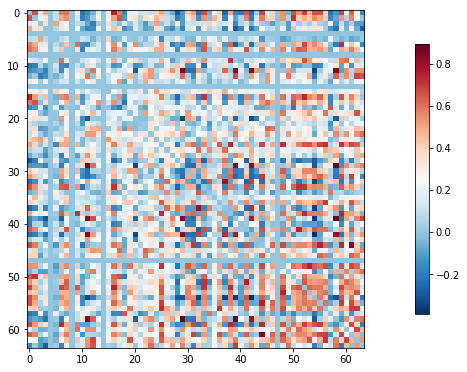

In [24]:
conf_filename = 'sub-pixar109_task-pixar_desc-confounds_regressors.tsv'
clean_fmri_matrix = label_masker.fit_transform(os.path.join(data_dir, fmri_filename),
                                               confounds=os.path.join(data_dir, conf_filename))
clean_correlation_matrix = correlation_measure.fit_transform([clean_fmri_matrix])[0]
np.fill_diagonal(clean_correlation_matrix, 0)
plotting.plot_matrix(clean_correlation_matrix)

That looks a little different !

Looking more closely, we can see that our correlation matrix is symmetrical; that is, that both sides of the diagonal contain the same information. We don't want to feed duplicate information into our machine learning classifier, and Nilearn has a really easy way to remove this redundancy ! 

In [25]:
vectorized_correlation = connectome.ConnectivityMeasure(kind='correlation',
                                                        vectorize=True, discard_diagonal=True)
clean_vectorized_correlation = vectorized_correlation.fit_transform([clean_fmri_matrix])[0]
clean_vectorized_correlation.shape  # Exercise: Why is this value not 64 * 64 ?

(2016,)

## [Interactive connectome plotting](http://nilearn.github.io/plotting/index.html#d-plots-of-connectomes)

It can also be helpful to project these connection weightings back on to the brain, to visualize these connectomes ! Here, we'll use the interactive connectome plotting in Nilearn.

In [26]:
coords = plotting.find_parcellation_cut_coords(multiscale.scale064)
view = plotting.view_connectome(clean_correlation_matrix, coords=coords)
view